In [1]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import expon
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams.update({'figure.figsize': (14, 8), 'figure.dpi': 200})
plt.style.use('seaborn-dark')

### Introduction

In this Exercise, we explore a nonparametric estimator for the distribution function, namely the empirical distribution function. Also, we show how to construct confidence intervals, with coverage of $1-\alpha$, $\alpha \in (0,1)$, for the distribution function based on the Dvoretzky-Kiefer-Wolfowitz Inequality. Finally, we explore the Glivenko-Cantelli Theorem.

A reminder that de empirical distribution function is defined by:
$${\displaystyle F_n(t) = {\hat {F}}_{n}(t)={\frac {{\mbox{number of elements in the sample}}\leq t}{n}}={\frac {1}{n}}\sum _{i=1}^{n}\mathbf {1} _{X_{i}\leq t},}$$
for a random sample given by $X_1, \ldots, X_n$, and where $\mathbf {1}$ is the indicator function.

First, let us simulate some data from a Exponential Distribution (Could be any other distribution).

In [2]:
# Fix Scale Parameter for Exponential Distribution
a = 10

In [3]:
# Get Population Mean, Variance, Skweness, and Kurtosis of X ~ Exponencial(a), such that E(X) = 10.
mean, var, skew, kurt = expon.stats(moments='mvsk',scale=a)

# Print Values
stats_names  = ['Mean', 'Variance', 'Skweness', 'Kurtosis']
stats_values = [mean, var, skew, kurt]
for n,s  in zip (stats_names, stats_values):
    print(str(n) + ': ' + str(s))

Mean: 10.0
Variance: 100.0
Skweness: 2.0
Kurtosis: 6.0


In [4]:
# Simulate Dataset of Size n for X ~ Exponencial(a), such that E(X) = 10.
n               = 30
sample_n        = expon.rvs(scale=a, size=n)
sorted_sample_n = np.sort(sample_n)

In [5]:
# Values in Simulated Sample
sample_n

array([12.91329262, 10.83638154,  5.802303  , 24.54781286,  4.14340619,
        5.71042822, 12.17921721,  5.32802398,  7.38276354, 20.00955559,
        5.35306593,  4.59537256, 16.11541621,  5.35080472,  6.59888211,
        8.6197434 ,  2.48640923,  4.1314266 ,  3.9195451 ,  9.71185389,
        0.75885595,  2.9971436 ,  4.07087994, 17.42508723, 10.04144349,
       32.36624601, 30.01261454, 49.50801824, 11.03471388,  2.65272959])

Now, we construct the Emprical Distribution Function (EDF) using statsmodels.

In [6]:
# Computed Emprical Distribution Function (EDF)
fde_n = ECDF(sample_n)

Text(0.5, 1.0, 'Empirical Distribution Function for a simulated sample size of 30 from an Exponencial(a) Distribution.')

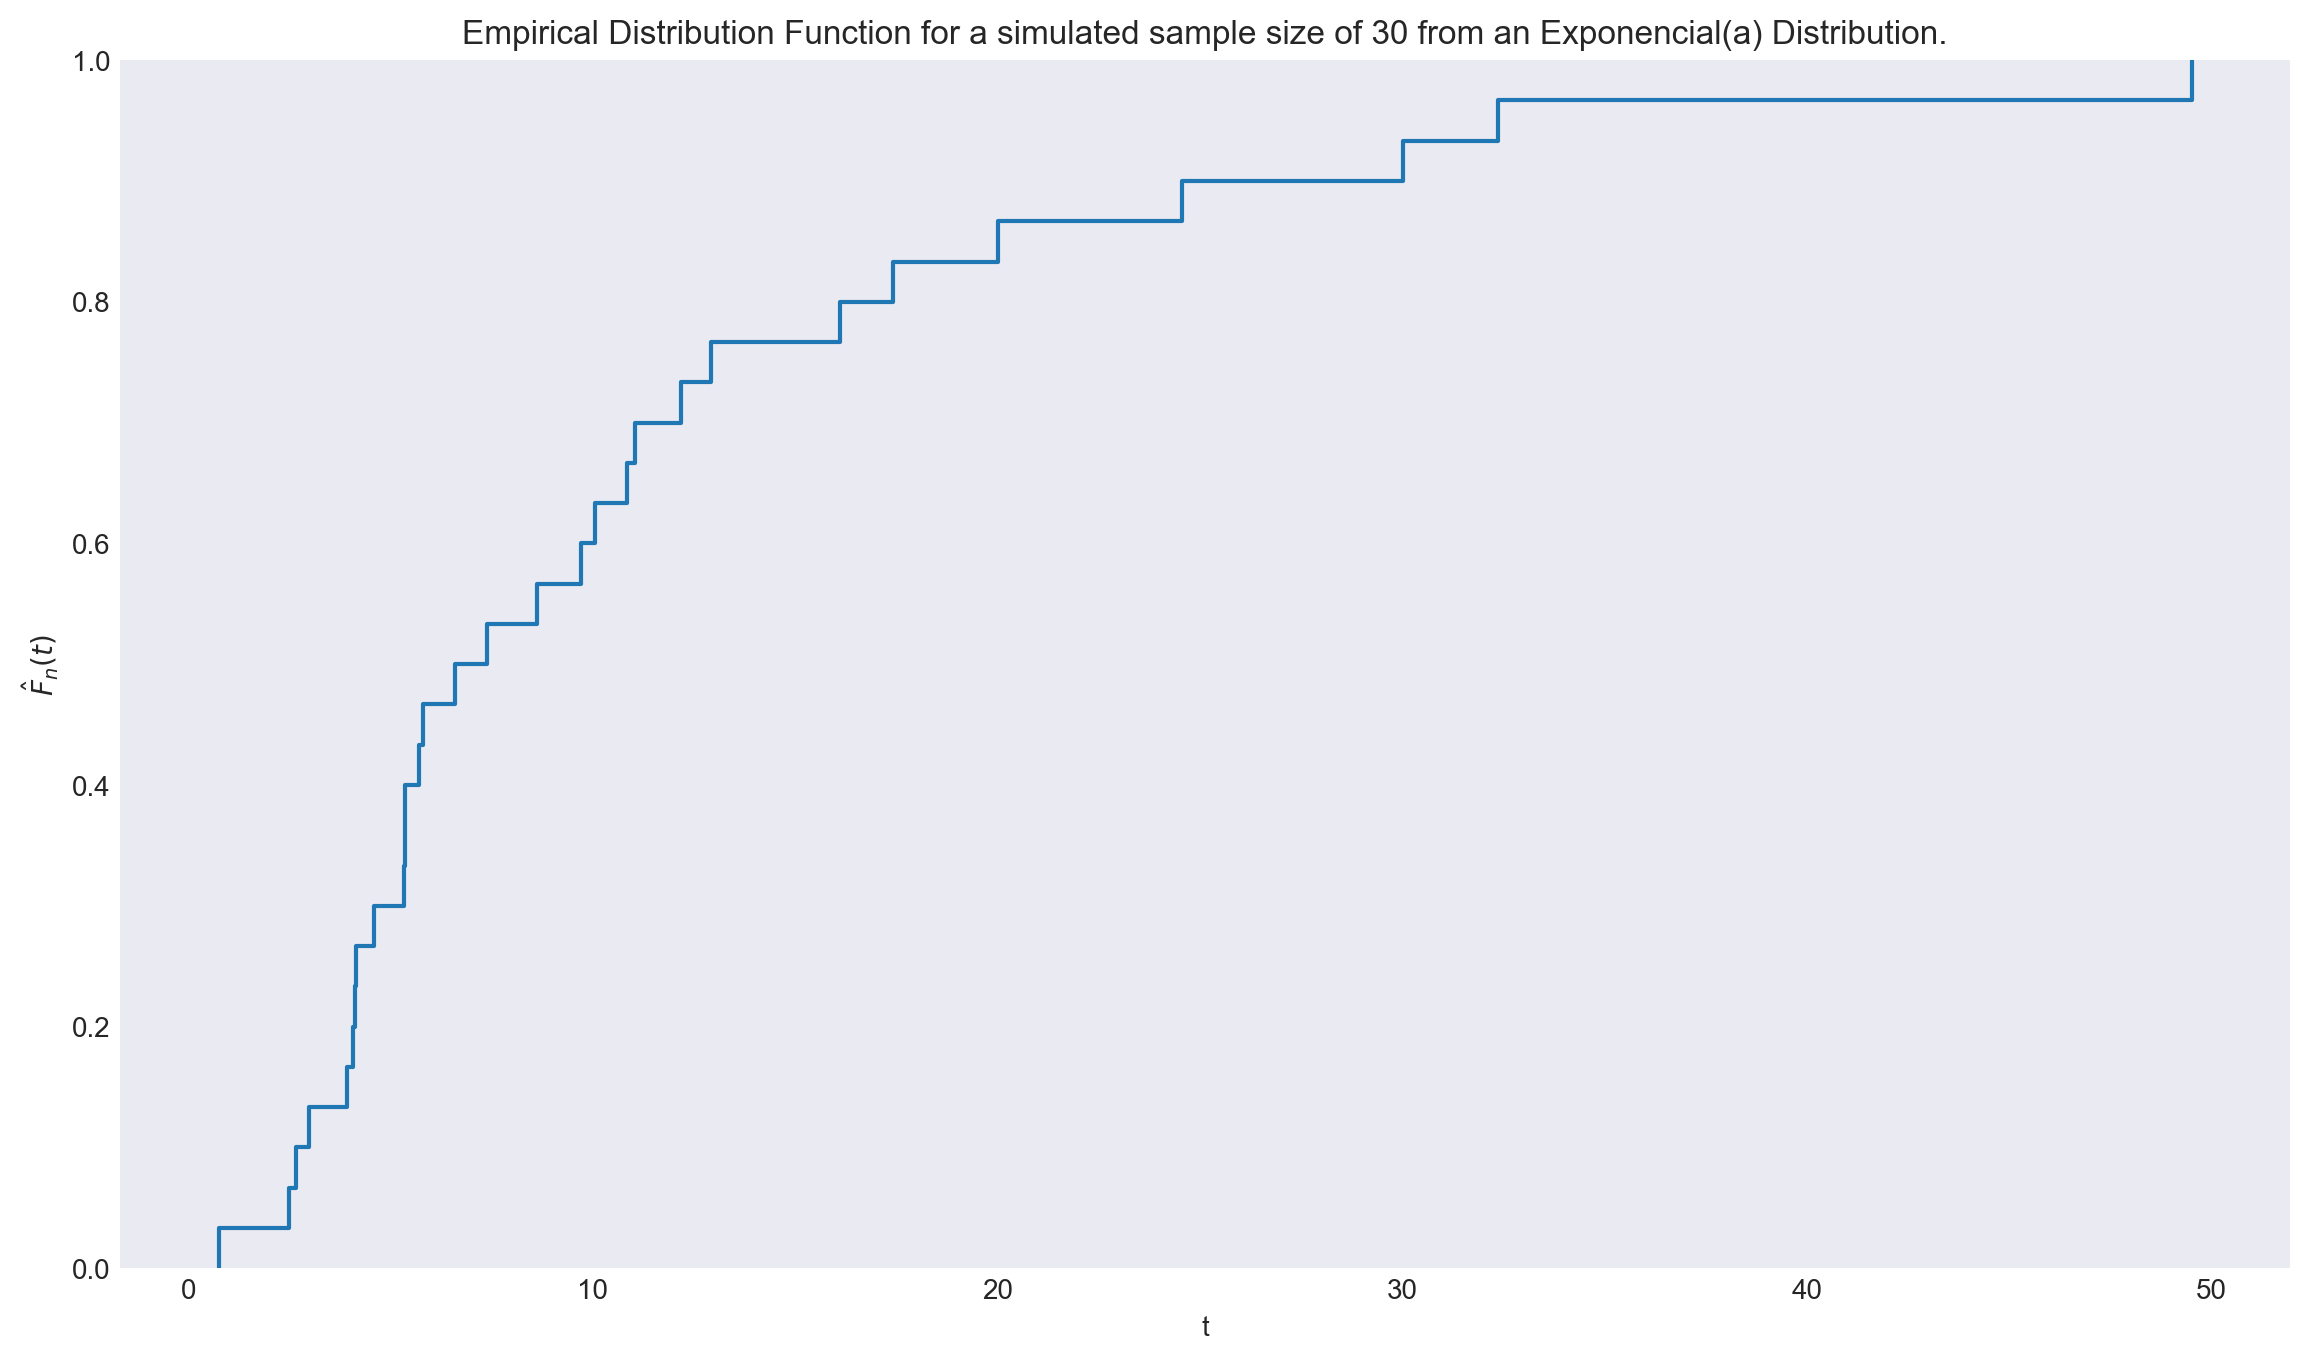

In [7]:
# Graph of EDF
fig, ax = plt.subplots(1, 1)
sns.ecdfplot(data=sample_n)
ax.set_xlabel('t')
ax.set_ylabel(r'$\hat{F}_n(t)$')
ax.set_title('Empirical Distribution Function for a simulated sample size of ' + str(n) + ' from an Exponencial(a) Distribution.')

We could also construct the EDF 'by hand'. First, we order the sample and then we compute the proportion of values in the sample that are less or equal to $t$ for all $t$.

In [8]:
# ordered EDF
fde_sorted_n = np.sort(fde_n(sample_n))

Text(0.5, 1.0, 'Empirical Distribution Function for a simulated sample size of 30 from an Exponencial(a) Distribution.')

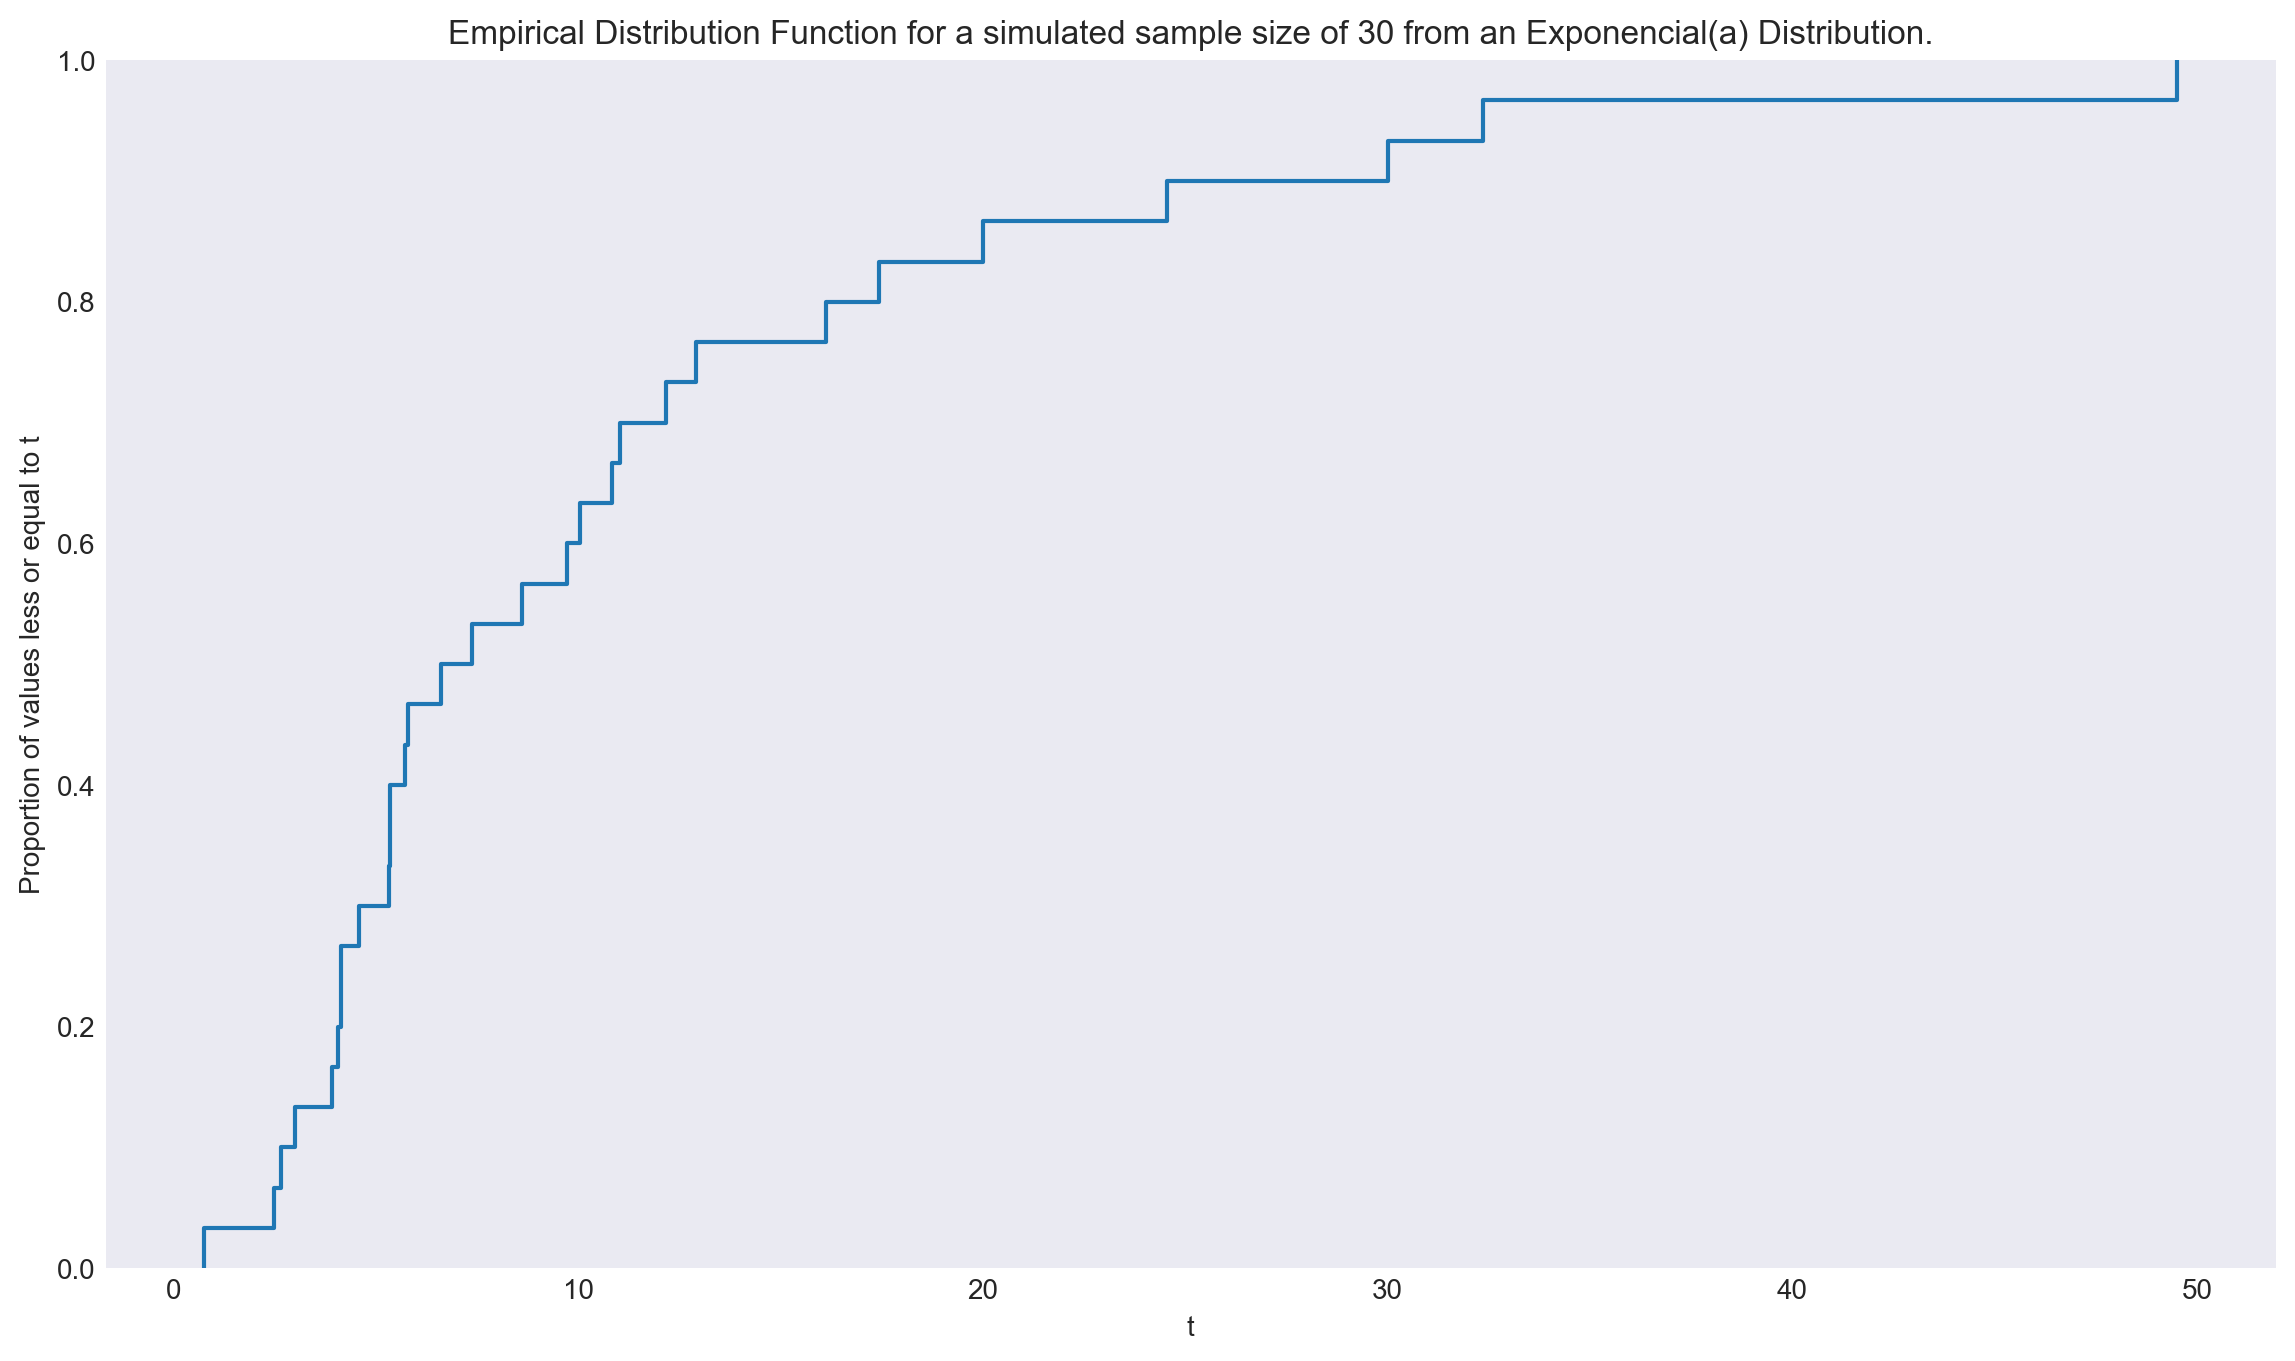

In [9]:
# 'Hand-Crafted' EDF
plt.vlines(x=sorted_sample_n[0], ymin=0, ymax= fde_n(sorted_sample_n[0]))
plt.step(sorted_sample_n, fde_sorted_n, where='post')
plt.ylim(0,1)
plt.xlabel('t')
plt.ylabel('Proportion of values less or equal to t')
plt.title('Empirical Distribution Function for a simulated sample size of ' + str(n) + ' from an Exponencial(a) Distribution.')

### Confidence Interval for Empirical Distribution Function based on the Dvoretzky-Kiefer-Wolfowitz Inequality

Now, let us construct the confidence intervals based on the Inequality given by
$$P \bigg( \sup_t | F(t) - F_n(t)  | > \epsilon \bigg) \leq 2 e^{-2n\epsilon^2}.$$
The limits of the confidence intervals are constructed by setting
    $$L(t) := \max \{F_n(t) - \epsilon_n, 0\}$$
and
    $$U(t) := \min \{F_n(t) + \epsilon_n, 1\}$$
such that
    $$\epsilon_n, = \sqrt{\frac{1}{2n} \ln \bigg( \frac{2}{\alpha} \bigg)} .$$
So, by the Inequality, for any distribution function $F$ and all $t$: 
    $$P \bigg( L(x) \leq F(x) \leq U(x) \bigg) \geq 1 - \alpha.$$

In [10]:
# Factor for Confidence Intervals Based on the Dvoretzky-Kiefer-Wolfowitz Inequality
alpha     = 0.05
epsilon_n = ((1/(2*n))*np.log(2/alpha))**(1/2)

In [11]:
# Computes FDE
F_n = fde_n(sorted_sample_n)
L_n = np.clip(a=(fde_sorted_n - epsilon_n), a_min = 0,    a_max = None)
U_n = np.clip(a=(fde_sorted_n + epsilon_n), a_min = None, a_max = 1)

Text(-0.1, -0.1, '*Confidence Intervals are Based on the Dvoretzky-Kiefer-Wolfowitz Inequality.')

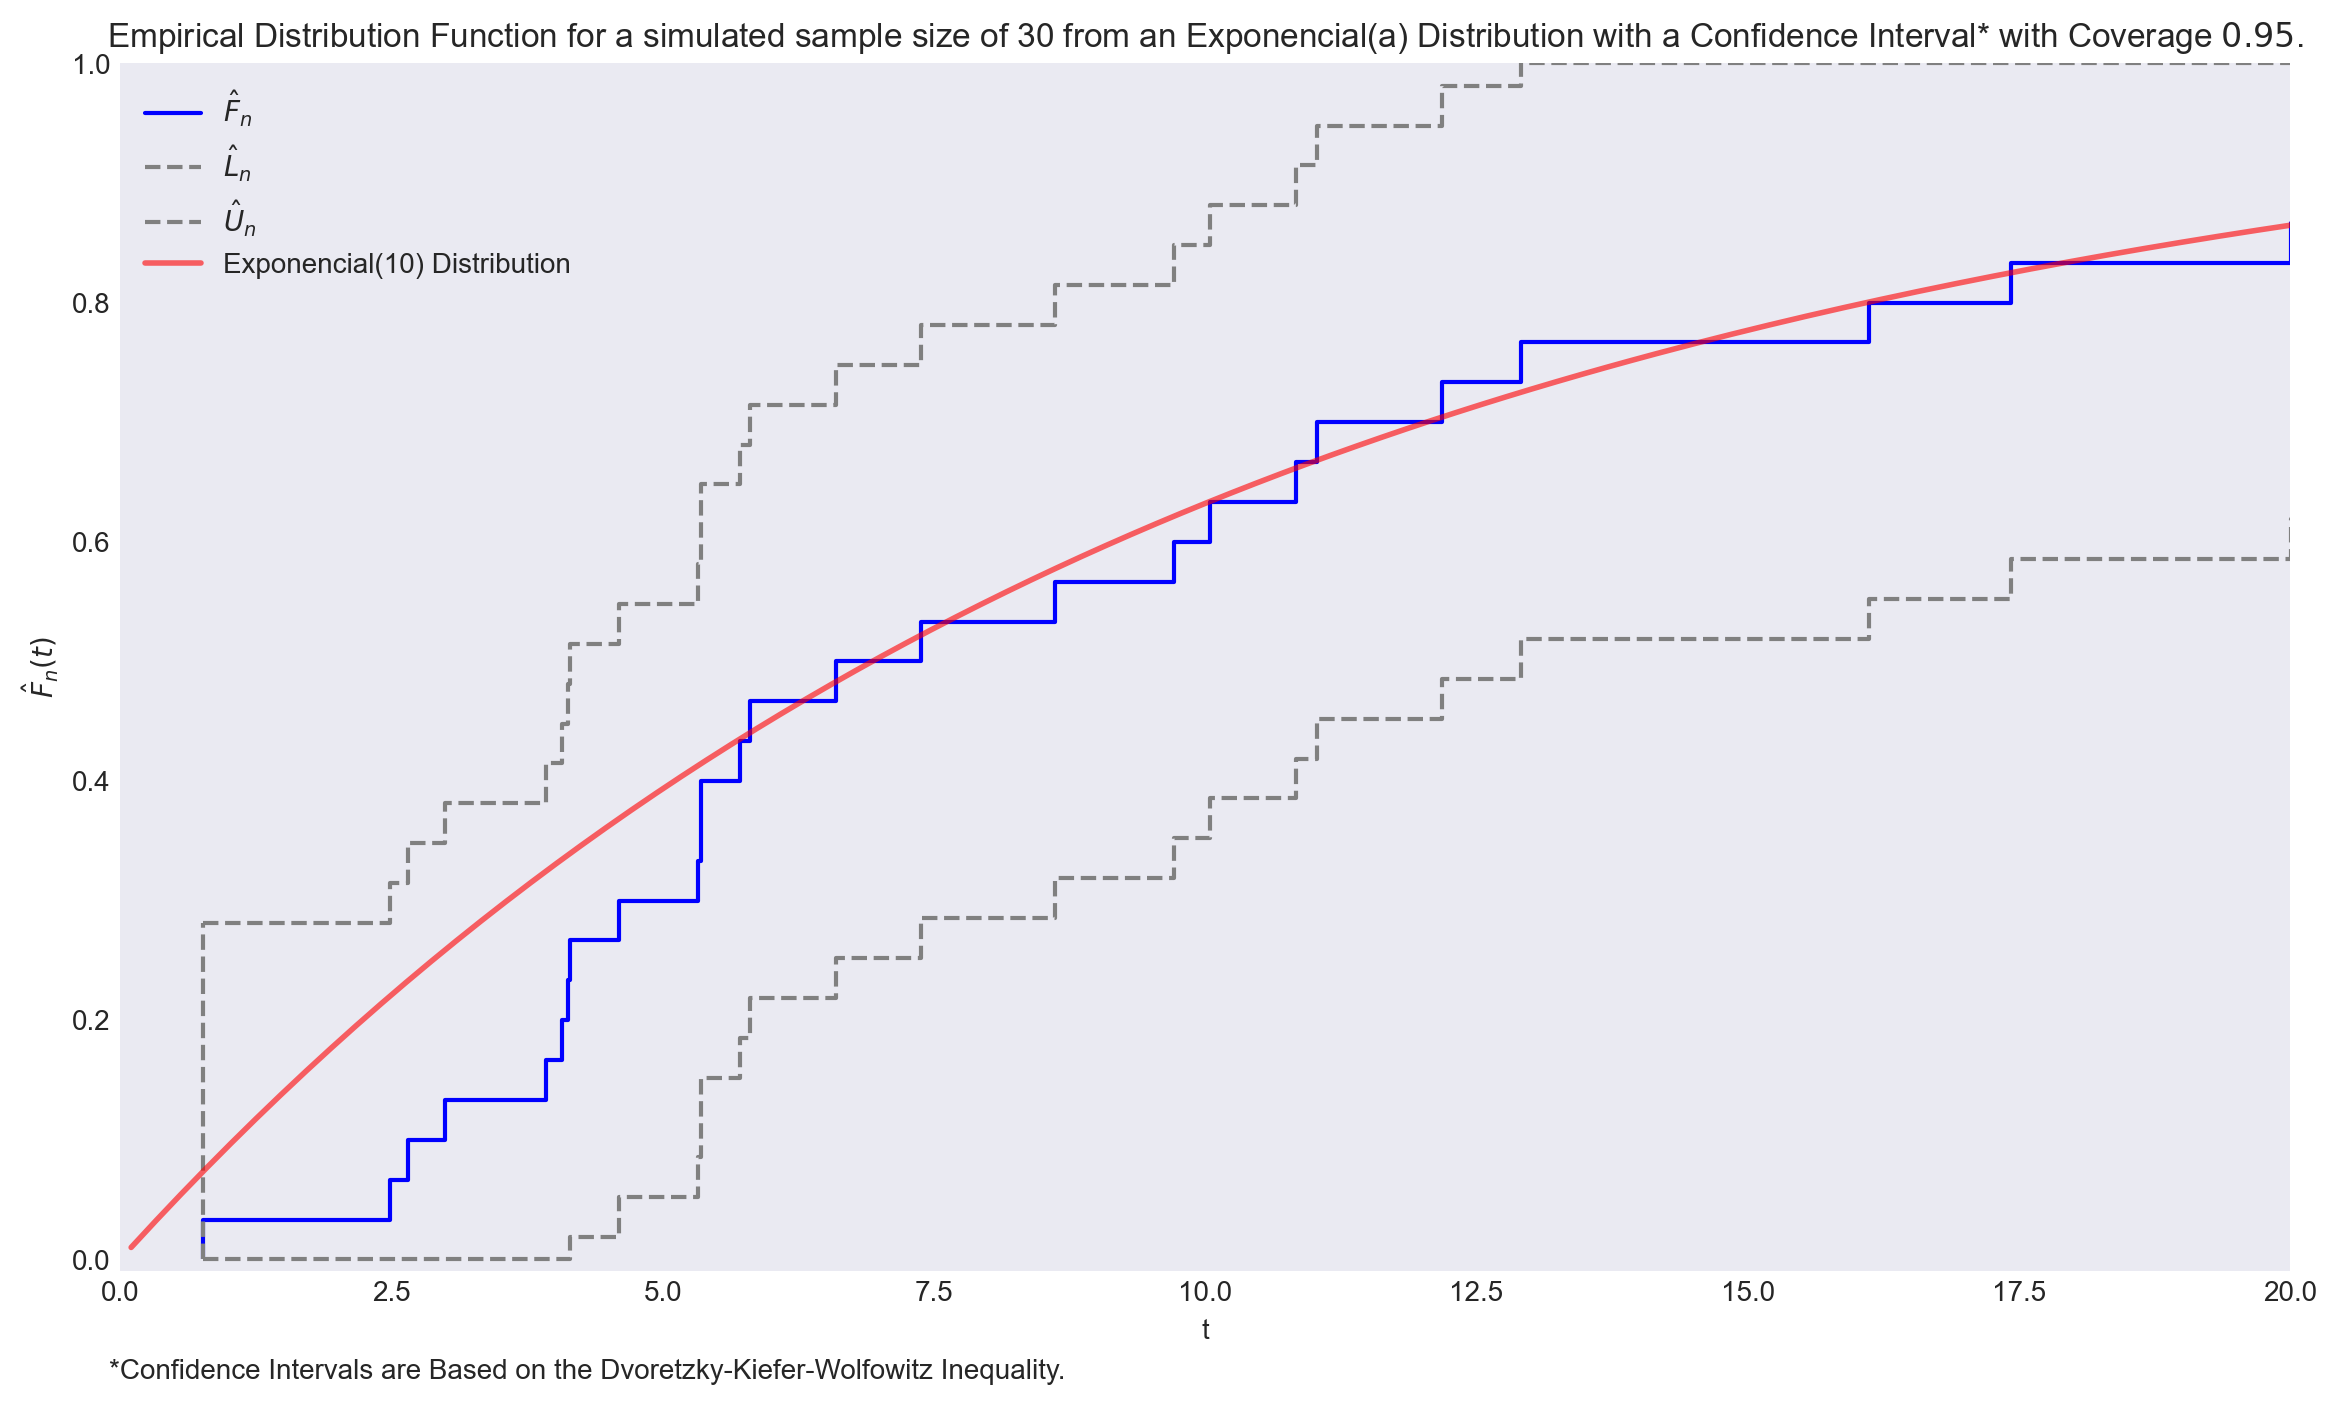

In [12]:

# FDE with a Confidence Interval of Coverage 1 - alpha
plt.step(sorted_sample_n, F_n, where='post', color='blue', label=r'$\hat{F}_n$')
plt.vlines(x=sorted_sample_n[0], ymin=0, ymax= fde_n(sorted_sample_n[0]), color='blue')
plt.step(sorted_sample_n, L_n, where='post', color='grey', label=r'$\hat{L}_n$', linestyle='--')
plt.step(sorted_sample_n, U_n, where='post', color='grey', label=r'$\hat{U}_n$', linestyle='--')
plt.vlines(x=sorted_sample_n[0], ymin=0, ymax= U_n[0], color='grey', linestyle='--')
x = np.linspace(expon.ppf(0.01, scale=a), expon.ppf(0.9, scale=a), 200)
plt.plot(x, expon.cdf(x, scale=10),       'r-', lw=2, alpha=0.6, label='Exponencial(10) Distribution')
plt.title('Empirical Distribution Function for a simulated sample size of ' + str(n) + r' from an Exponencial(a) Distribution with a Confidence Interval* with Coverage $0.95$.')
plt.ylim(-0.01,1)
plt.xlim(0,20)
plt.xlabel('t')
plt.ylabel(r'$\hat{F}_n(t)$')
plt.legend()
plt.text(-0.1, -0.1, '*Confidence Intervals are Based on the Dvoretzky-Kiefer-Wolfowitz Inequality.')

## Glivenko-Cantelli

Now, let us see the behaviour of the Glivenko Cantelli Theorem for this simple Example. As a reminder, the Glivenko-Cantelli Theorem states that
$$\sup|F_{n}(t)-F(t)|\longrightarrow 0, \quad, t\in \mathbb {R}, n \to \infty,$$
almost surely.

In [13]:
# Simulate data from  X ~ Exponencial(a), s.t. E(X) = a = 10.
n1 = 30
n2 = 100
n3 = 1000
n4 = 10000

sample_n1 = expon.rvs(scale=a, size=n1)
sample_n2 = expon.rvs(scale=a, size=n2)
sample_n3 = expon.rvs(scale=a, size=n3)
sample_n4 = expon.rvs(scale=a, size=n4)

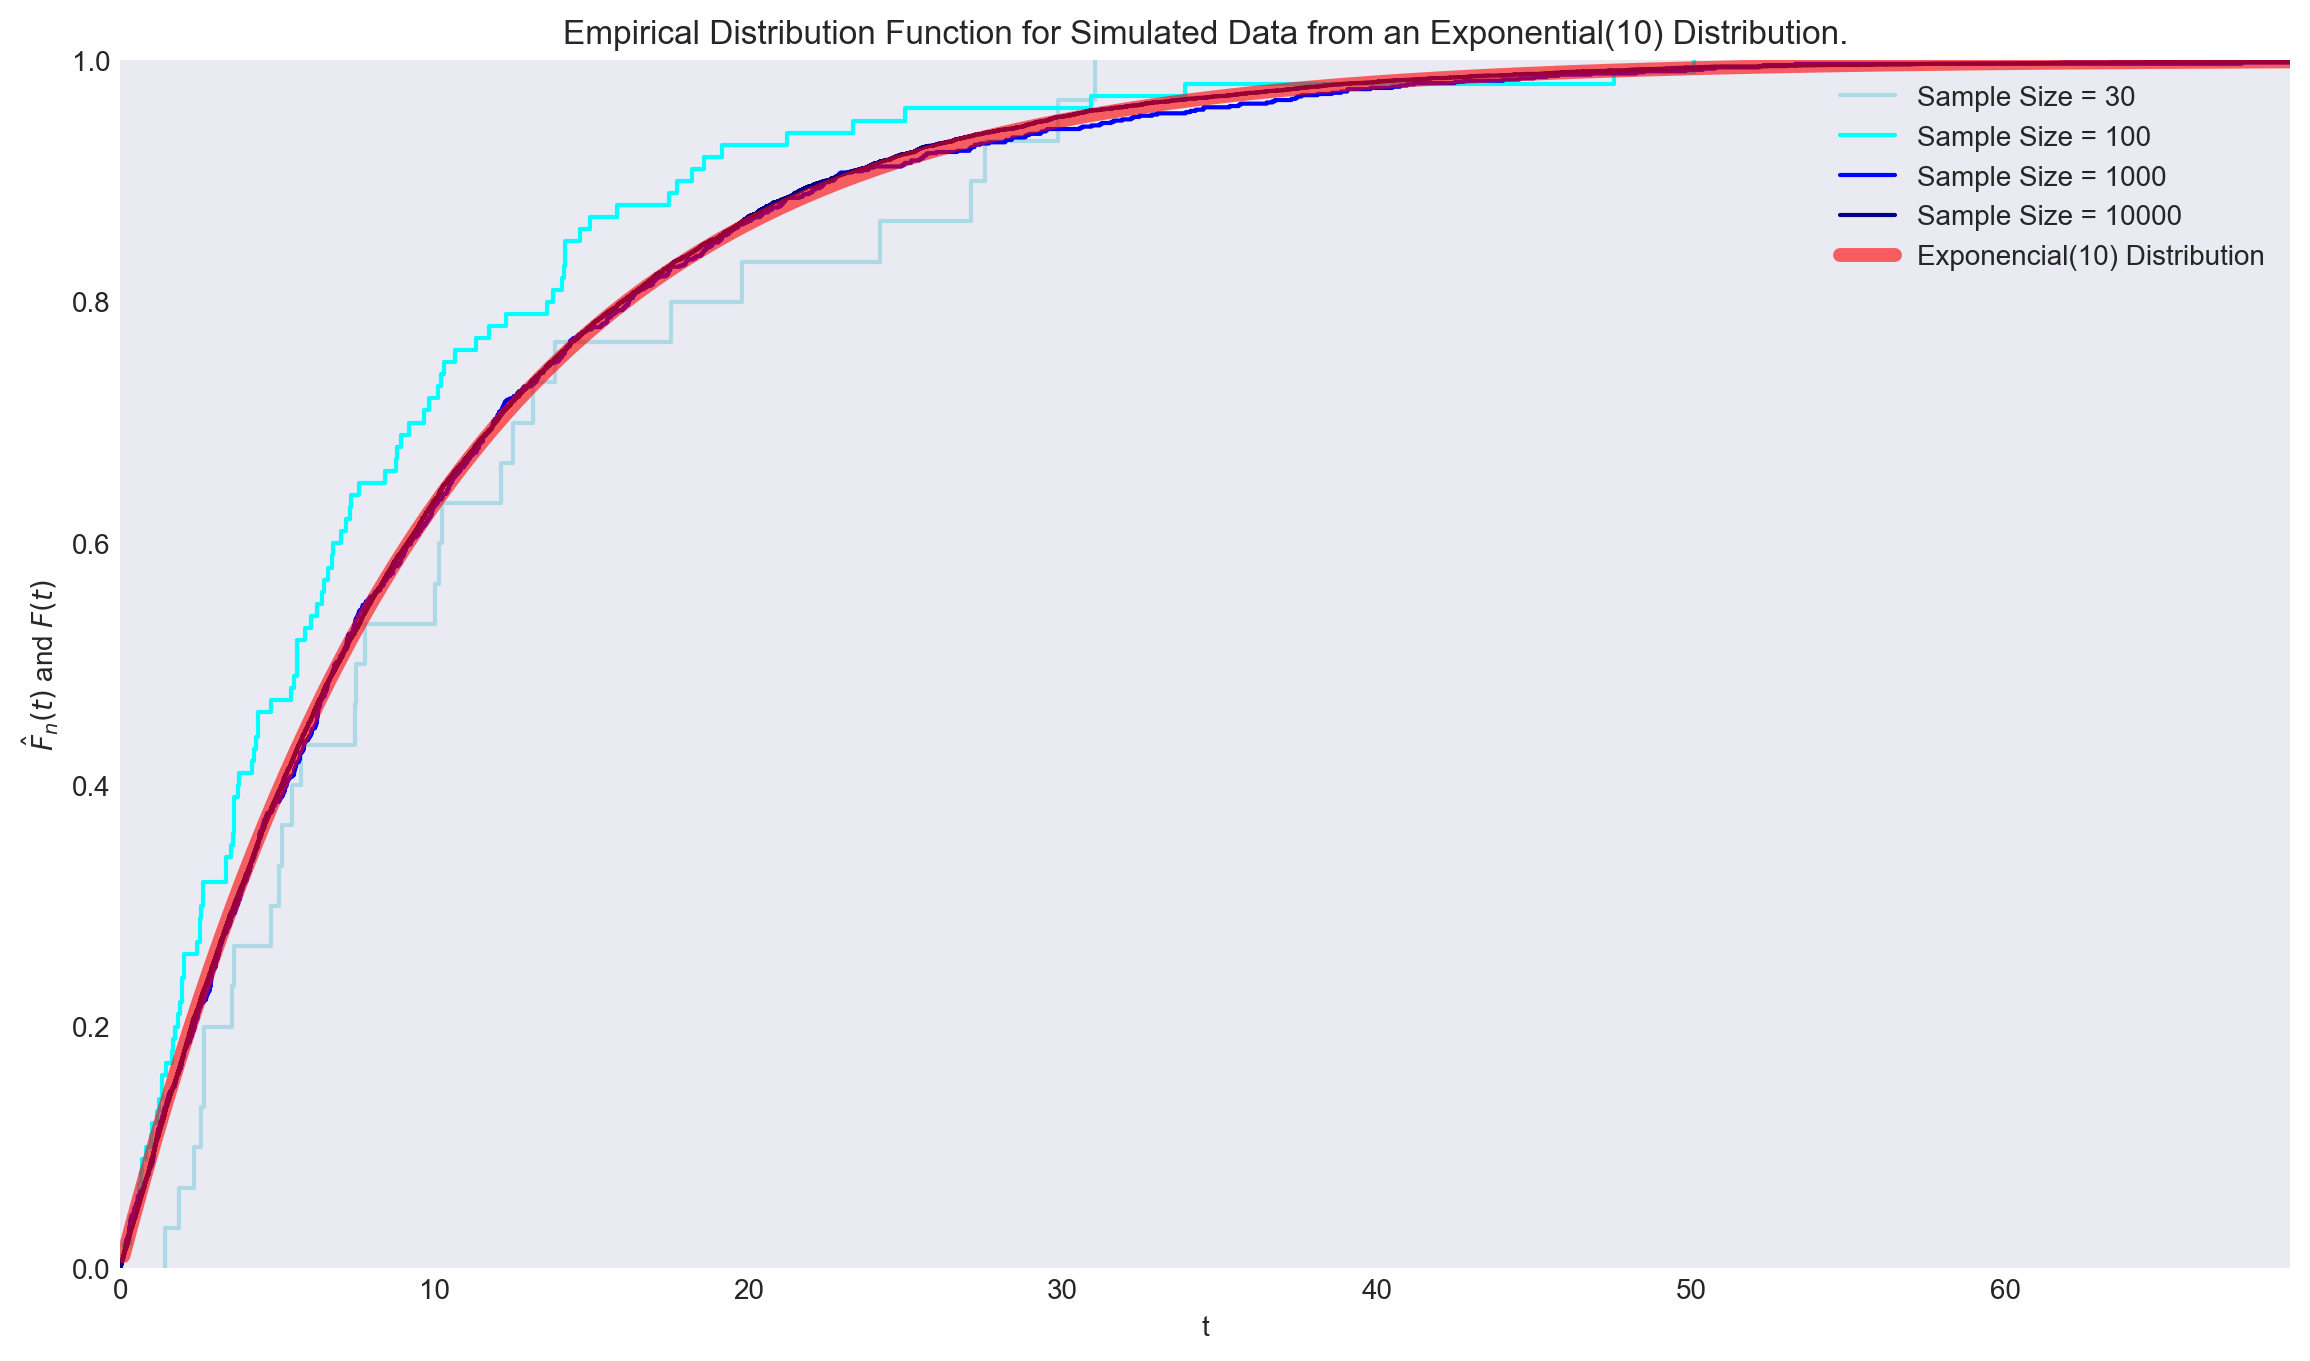

In [14]:
# Gráfico de la Supervivencia Empírica
fig, ax = plt.subplots(1, 1)

x = np.linspace(expon.ppf(0.01, scale=a), expon.ppf(0.999, scale=a), 200)

sns.ecdfplot(data=sample_n1, color='lightblue',     label='Sample Size = ' + str(n1))
sns.ecdfplot(data=sample_n2, color='cyan',          label='Sample Size = ' + str(n2))
sns.ecdfplot(data=sample_n3, color='blue',          label='Sample Size = ' + str(n3))
sns.ecdfplot(data=sample_n4, color='darkblue',      label='Sample Size = ' + str(n4))

ax.plot(x, expon.cdf(x, scale=10),       'r-', lw=5, alpha=0.6, label='Exponencial(10) Distribution')

ax.set_xlabel('t')
ax.set_ylabel(r'$\hat{F}_n(t)$ and $F(t)$')
ax.set_xlim(0, max(x))
plt.title('Empirical Distribution Function for Simulated Data from an Exponential(10) Distribution.')
ax.legend()

In [15]:
## Errores de Estimación para la media aumentando el tamaño de muestra
print( 'Estimation Error in the Mean for the Sample Size of ' +  str(n1) + ' is: ' + str(abs(10 - sample_n1.mean())))
print( 'Estimation Error in the Mean for the Sample Size of ' +  str(n2) + ' is: ' + str(abs(10 - sample_n2.mean())))
print( 'Estimation Error in the Mean for the Sample Size of ' +  str(n3) + ' is: ' + str(abs(10 - sample_n3.mean())))
print( 'Estimation Error in the Mean for the Sample Size of ' +  str(n4) + ' is: ' + str(abs(10 - sample_n4.mean())))

Estimation Error in the Mean for the Sample Size of 30 is: 0.9556205007048462
Estimation Error in the Mean for the Sample Size of 100 is: 1.8788327884225318
Estimation Error in the Mean for the Sample Size of 1000 is: 0.17170198309231388
Estimation Error in the Mean for the Sample Size of 10000 is: 0.07843666949736594


We can see the convergence of the Empirical Distribution Function to the Population Distribution Function.

We have seen some pretty powerful statistical tools since they do not require restrictive assumptions on the distribution function. But, these methods do require a larger sample size compared to parametric estimation methods, so keep that in mind.